In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from IPython.display import display


#filename = "tags"
#filename = "recipes"
#filename = "nutritions"
#filename = "ingredients"

df_tags = pd.read_csv(f"/data/foodboost/tags.csv", index_col = 0) 
df_recipes = pd.read_csv(f"/data/foodboost/recipes.csv")
df_nutritions = pd.read_csv(f"/data/foodboost/nutritions.csv", index_col = 0)
df_ingredients = pd.read_csv(f"/data/foodboost/ingredients.csv", index_col = 0)




In [3]:
voedingswaarden = df_nutritions.pivot(index = 'recipe', columns = 'nutrition')

In [4]:
voedingswaarden

value            \
nutrition                                          eiwit   energie   
recipe                                                               
 Andijviestamppot met gebakken salami               25 g  630 kcal   
 Bietensoep met selderijroom                         3 g  160 kcal   
 Libanese wraps met appel-koolsalade                21 g  440 kcal   
 Plaattaart met gegrilde groenten en witte kaas     16 g  550 kcal   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...   8 g  235 kcal   
...                                                  ...       ...   
Zweedse gehaktballetjes met room                    33 g  640 kcal   
Zweedse vegaballetjes met aardappel &amp; broccoli  38 g  770 kcal   
Zwitserse kaasfondue                                56 g  850 kcal   
Îles flottantes                                     10 g  290 kcal   
‘Nasi’ met Hollandse soepgroente                    18 g  500 kcal   

                                                                          \
nutrition                                          koolhydraten  natrium   
recipe                                                                     
 Andijviestamppot met gebakken salami                      36 g  1875 mg   
 Bietensoep met selderijroom                               11 g  1160 mg   
 Libanese wraps met appel-koolsalade                       45 g   440 mg   
 Plaattaart met gegrilde groenten en witte kaas            38 g   760 mg   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...         16 g   800 mg   
...                                                         ...      ...   
Zweedse gehaktballetjes met room                           26 g   520 mg   
Zweedse vegaballetjes met aardappel &amp; broccoli         76 g  1320 mg   
Zwitserse kaasfondue                                        7 g   920 mg   
Îles flottantes                                            49 g   125 mg   
‘Nasi’ met Hollandse soepgroente                           71 g   200 mg   

                                                                 \
nutrition                                            vet vezels   
recipe                                                            
 Andijviestamppot met gebakken salami               41 g    7 g   
 Bietensoep met selderijroom                        11 g    5 g   
 Libanese wraps met appel-koolsalade                18 g    9 g   
 Plaattaart met gegrilde groenten en witte kaas     35 g    8 g   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...  14 g    6 g   
...                                                  ...    ...   
Zweedse gehaktballetjes met room                    45 g    2 g   
Zweedse vegaballetjes met aardappel &amp; broccoli  31 g   17 g   
Zwitserse kaasfondue                                63 g    0 g   
Îles flottantes                                      6 g    NaN   
‘Nasi’ met Hollandse soepgroente                    14 g    7 g   

                                                                    \
nutrition                                          waarvan suikers   
recipe                                                               
 Andijviestamppot met gebakken salami                          NaN   
 Bietensoep met selderijroom                                   NaN   
 Libanese wraps met appel-koolsalade                           NaN   
 Plaattaart met gegrilde groenten en witte kaas               11 g   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...             NaN   
...                                                            ...   
Zweedse gehaktballetjes met room                               NaN   
Zweedse vegaballetjes met aardappel &amp; broccoli             NaN   
Zwitserse kaasfondue                                           5 g   
Îles flottantes                                                NaN   
‘Nasi’ met Hollandse soepgroente                               8 g   

                                                                      
nutrition     

In [5]:
voedingswaarden.fillna(0)

value            \
nutrition                                          eiwit   energie   
recipe                                                               
 Andijviestamppot met gebakken salami               25 g  630 kcal   
 Bietensoep met selderijroom                         3 g  160 kcal   
 Libanese wraps met appel-koolsalade                21 g  440 kcal   
 Plaattaart met gegrilde groenten en witte kaas     16 g  550 kcal   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...   8 g  235 kcal   
...                                                  ...       ...   
Zweedse gehaktballetjes met room                    33 g  640 kcal   
Zweedse vegaballetjes met aardappel &amp; broccoli  38 g  770 kcal   
Zwitserse kaasfondue                                56 g  850 kcal   
Îles flottantes                                     10 g  290 kcal   
‘Nasi’ met Hollandse soepgroente                    18 g  500 kcal   

                                                                          \
nutrition                                          koolhydraten  natrium   
recipe                                                                     
 Andijviestamppot met gebakken salami                      36 g  1875 mg   
 Bietensoep met selderijroom                               11 g  1160 mg   
 Libanese wraps met appel-koolsalade                       45 g   440 mg   
 Plaattaart met gegrilde groenten en witte kaas            38 g   760 mg   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...         16 g   800 mg   
...                                                         ...      ...   
Zweedse gehaktballetjes met room                           26 g   520 mg   
Zweedse vegaballetjes met aardappel &amp; broccoli         76 g  1320 mg   
Zwitserse kaasfondue                                        7 g   920 mg   
Îles flottantes                                            49 g   125 mg   
‘Nasi’ met Hollandse soepgroente                           71 g   200 mg   

                                                                 \
nutrition                                            vet vezels   
recipe                                                            
 Andijviestamppot met gebakken salami               41 g    7 g   
 Bietensoep met selderijroom                        11 g    5 g   
 Libanese wraps met appel-koolsalade                18 g    9 g   
 Plaattaart met gegrilde groenten en witte kaas     35 g    8 g   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...  14 g    6 g   
...                                                  ...    ...   
Zweedse gehaktballetjes met room                    45 g    2 g   
Zweedse vegaballetjes met aardappel &amp; broccoli  31 g   17 g   
Zwitserse kaasfondue                                63 g    0 g   
Îles flottantes                                      6 g      0   
‘Nasi’ met Hollandse soepgroente                    14 g    7 g   

                                                                    \
nutrition                                          waarvan suikers   
recipe                                                               
 Andijviestamppot met gebakken salami                            0   
 Bietensoep met selderijroom                                     0   
 Libanese wraps met appel-koolsalade                             0   
 Plaattaart met gegrilde groenten en witte kaas               11 g   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...               0   
...                                                            ...   
Zweedse gehaktballetjes met room                                 0   
Zweedse vegaballetjes met aardappel &amp; broccoli               0   
Zwitserse kaasfondue                                           5 g   
Îles flottantes                                                  0   
‘Nasi’ met Hollandse soepgroente                               8 g   

                                                                      
nutrition     

In [6]:
test1 = df_ingredients[['recipe', 'ingredient', 'quantity']]

In [7]:
test1

,recipe,ingredient,quantity
0,Kruidnoten met choco-discodip,melkchocolade,100.0
1,Kruidnoten met choco-discodip,kruidnoten,100.0
2,Kruidnoten met choco-discodip,discodip,2.0
3,Kruidnoten in marsepein,blanke marsepein,150.0
4,Kruidnoten in marsepein,ongezouten roomboter,15.0
...,...,...,...
71804,Biefstuk met rodewijnsaus en ham,olijfolie,4.0
71805,Biefstuk met rodewijnsaus en ham,biefstukken,4.0
71806,Biefstuk met rodewijnsaus en ham,boter,25.0
71807,Biefstuk met rodewijnsaus en ham,serranoham,4.0


In [8]:
df_tags

,recipe,tag
0,Kruidnoten met choco-discodip,hollands
1,Kruidnoten met choco-discodip,gebak
2,Kruidnoten met choco-discodip,gebak
3,Kruidnoten met choco-discodip,sinterklaas
4,Kruidnoten met choco-discodip,sinterklaasavond
...,...,...
46035,Pittige truffels,nagerecht
46036,Biefstuk met rodewijnsaus en ham,snel
46037,Biefstuk met rodewijnsaus en ham,mediterraan
46038,Biefstuk met rodewijnsaus en ham,hoofdgerecht


In [9]:
mas_curry = df_tags[df_tags['recipe']=='Massaman curry']
mas_curry

,recipe,tag
25,Massaman curry,lactosevrij
26,Massaman curry,thais
27,Massaman curry,aziatisch
28,Massaman curry,curry
29,Massaman curry,hoofdgerecht
30,Massaman curry,koken


In [10]:
df_tags['recipe'].unique()

array(['Kruidnoten met choco-discodip', 'Kruidnoten in marsepein',
       'Kruidnoten met chocodips', ..., 'Ceviche met sint-jakobsschelpen',
       'Pittige truffels', 'Biefstuk met rodewijnsaus en ham'],
      dtype=object)

In [11]:
testlist = mas_curry['tag'].tolist()

In [12]:
testlist

['lactosevrij', 'thais', 'aziatisch', 'curry', 'hoofdgerecht', 'koken']

In [13]:
#Regressie op nutritions

In [14]:
raw_nutritions = df_nutritions.pivot(index = 'recipe', columns = 'nutrition')

In [15]:
raw_nutritions

value            \
nutrition                                          eiwit   energie   
recipe                                                               
 Andijviestamppot met gebakken salami               25 g  630 kcal   
 Bietensoep met selderijroom                         3 g  160 kcal   
 Libanese wraps met appel-koolsalade                21 g  440 kcal   
 Plaattaart met gegrilde groenten en witte kaas     16 g  550 kcal   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...   8 g  235 kcal   
...                                                  ...       ...   
Zweedse gehaktballetjes met room                    33 g  640 kcal   
Zweedse vegaballetjes met aardappel &amp; broccoli  38 g  770 kcal   
Zwitserse kaasfondue                                56 g  850 kcal   
Îles flottantes                                     10 g  290 kcal   
‘Nasi’ met Hollandse soepgroente                    18 g  500 kcal   

                                                                          \
nutrition                                          koolhydraten  natrium   
recipe                                                                     
 Andijviestamppot met gebakken salami                      36 g  1875 mg   
 Bietensoep met selderijroom                               11 g  1160 mg   
 Libanese wraps met appel-koolsalade                       45 g   440 mg   
 Plaattaart met gegrilde groenten en witte kaas            38 g   760 mg   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...         16 g   800 mg   
...                                                         ...      ...   
Zweedse gehaktballetjes met room                           26 g   520 mg   
Zweedse vegaballetjes met aardappel &amp; broccoli         76 g  1320 mg   
Zwitserse kaasfondue                                        7 g   920 mg   
Îles flottantes                                            49 g   125 mg   
‘Nasi’ met Hollandse soepgroente                           71 g   200 mg   

                                                                 \
nutrition                                            vet vezels   
recipe                                                            
 Andijviestamppot met gebakken salami               41 g    7 g   
 Bietensoep met selderijroom                        11 g    5 g   
 Libanese wraps met appel-koolsalade                18 g    9 g   
 Plaattaart met gegrilde groenten en witte kaas     35 g    8 g   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...  14 g    6 g   
...                                                  ...    ...   
Zweedse gehaktballetjes met room                    45 g    2 g   
Zweedse vegaballetjes met aardappel &amp; broccoli  31 g   17 g   
Zwitserse kaasfondue                                63 g    0 g   
Îles flottantes                                      6 g    NaN   
‘Nasi’ met Hollandse soepgroente                    14 g    7 g   

                                                                    \
nutrition                                          waarvan suikers   
recipe                                                               
 Andijviestamppot met gebakken salami                          NaN   
 Bietensoep met selderijroom                                   NaN   
 Libanese wraps met appel-koolsalade                           NaN   
 Plaattaart met gegrilde groenten en witte kaas               11 g   
 Sticky cauliflower (gegrilde bloemkoolroosjes)...             NaN   
...                                                            ...   
Zweedse gehaktballetjes met room                               NaN   
Zweedse vegaballetjes met aardappel &amp; broccoli             NaN   
Zwitserse kaasfondue                                           5 g   
Îles flottantes                                                NaN   
‘Nasi’ met Hollandse soepgroente                               8 g   

                                                                      
nutrition     

In [16]:
raw_nutritions.dtypes

       nutrition        
value  eiwit                object
       energie              object
       koolhydraten         object
       natrium              object
       vet                  object
       vezels               object
       waarvan suikers      object
       waarvan verzadigd    object
dtype: object

In [17]:
eiwit_df = raw_nutritions['value']['eiwit'] 

In [18]:
eiwit_df

recipe
 Andijviestamppot met gebakken salami                                 25 g
 Bietensoep met selderijroom                                           3 g
 Libanese wraps met appel-koolsalade                                  21 g
 Plaattaart met gegrilde groenten en witte kaas                       16 g
 Sticky cauliflower (gegrilde bloemkoolroosjes) van Jord Althuizen     8 g
                                                                      ... 
Zweedse gehaktballetjes met room                                      33 g
Zweedse vegaballetjes met aardappel &amp; broccoli                    38 g
Zwitserse kaasfondue                                                  56 g
Îles flottantes                                                       10 g
‘Nasi’ met Hollandse soepgroente                                      18 g
Name: eiwit, Length: 8706, dtype: object

In [19]:
raw_nutritions.reset_index()

recipe value            \
nutrition                                                    eiwit   energie   
0                       Andijviestamppot met gebakken salami  25 g  630 kcal   
1                                Bietensoep met selderijroom   3 g  160 kcal   
2                        Libanese wraps met appel-koolsalade  21 g  440 kcal   
3             Plaattaart met gegrilde groenten en witte kaas  16 g  550 kcal   
4           Sticky cauliflower (gegrilde bloemkoolroosjes...   8 g  235 kcal   
...                                                      ...   ...       ...   
8701                        Zweedse gehaktballetjes met room  33 g  640 kcal   
8702       Zweedse vegaballetjes met aardappel &amp; broc...  38 g  770 kcal   
8703                                    Zwitserse kaasfondue  56 g  850 kcal   
8704                                         Îles flottantes  10 g  290 kcal   
8705                        ‘Nasi’ met Hollandse soepgroente  18 g  500 kcal   

                                                                                
nutrition koolhydraten  natrium   vet vezels waarvan suikers waarvan verzadigd  
0                 36 g  1875 mg  41 g    7 g             NaN              17 g  
1                 11 g  1160 mg  11 g    5 g             NaN               5 g  
2                 45 g   440 mg  18 g    9 g             NaN               3 g  
3                 38 g   760 mg  35 g    8 g            11 g              16 g  
4                 16 g   800 mg  14 g    6 g             NaN               2 g  
...                ...      ...   ...    ...             ...               ...  
8701              26 g   520 mg  45 g    2 g             NaN              22 g  
8702              76 g  1320 mg  31 g   17 g             NaN              10 g  
8703               7 g   920 mg  63 g    0 g             5 g              38 g  
8704              49 g   125 mg   6 g    NaN             NaN               3 g  
8705              71 g   200 mg  14 g    7 g             8 g               3 g  

[8706 rows x 9 columns]

In [20]:
raw_nutritions.columns = raw_nutritions.columns.droplevel(0) 
raw_nutritions.columns.name = None              
raw_nutritions = raw_nutritions.reset_index()

In [21]:
raw_nutritions

,recipe,eiwit,energie,koolhydraten,natrium,vet,vezels,waarvan suikers,waarvan verzadigd
0,Andijviestamppot met gebakken salami,25 g,630 kcal,36 g,1875 mg,41 g,7 g,NaN,17 g
1,Bietensoep met selderijroom,3 g,160 kcal,11 g,1160 mg,11 g,5 g,NaN,5 g
2,Libanese wraps met appel-koolsalade,21 g,440 kcal,45 g,440 mg,18 g,9 g,NaN,3 g
3,Plaattaart met gegrilde groenten en witte kaas,16 g,550 kcal,38 g,760 mg,35 g,8 g,11 g,16 g
4,Sticky cauliflower (gegrilde bloemkoolroosjes...,8 g,235 kcal,16 g,800 mg,14 g,6 g,NaN,2 g
...,...,...,...,...,...,...,...,...,...
8701,Zweedse gehaktballetjes met room,33 g,640 kcal,26 g,520 mg,45 g,2 g,NaN,22 g
8702,Zweedse vegaballetjes met aardappel &amp; broc...,38 g,770 kcal,76 g,1320 mg,31 g,17 g,NaN,10 g
8703,Zwitserse kaasfondue,56 g,850 kcal,7 g,920 mg,63 g,0 g,5 g,38 g
8704,Îles flottantes,10 g,290 kcal,49 g,125 mg,6 g,NaN,NaN,3 g


In [22]:
a = raw_nutritions[['eiwit', 'energie']]

In [23]:
a = a.dropna()

In [24]:
a = a.reset_index()

In [25]:
a = a[['eiwit', 'energie']]

In [26]:
a

,eiwit,energie
0,25 g,630 kcal
1,3 g,160 kcal
2,21 g,440 kcal
3,16 g,550 kcal
4,8 g,235 kcal
...,...,...
8591,33 g,640 kcal
8592,38 g,770 kcal
8593,56 g,850 kcal
8594,10 g,290 kcal


In [27]:
a.dtypes

eiwit      object
energie    object
dtype: object

In [28]:
lijst_energie = []
lijst_eiwit = []
for i in range(len(a)):
    lijst_energie.append(a['energie'][i][:-5])
    lijst_eiwit.append(a['eiwit'][i][:-2])

In [29]:
a['energie'] = lijst_energie
a['eiwit'] = lijst_eiwit

In [30]:
a

,eiwit,energie
0,25,630
1,3,160
2,21,440
3,16,550
4,8,235
...,...,...
8591,33,640
8592,38,770
8593,56,850
8594,10,290


In [31]:
a['eiwit'] = a['eiwit'].astype('float')
a['energie'] = a['energie'].astype('int')

In [32]:
a.dtypes

eiwit      float64
energie      int64
dtype: object

In [33]:
x = a['eiwit'].to_frame()

In [34]:
y = a['energie'].to_frame()

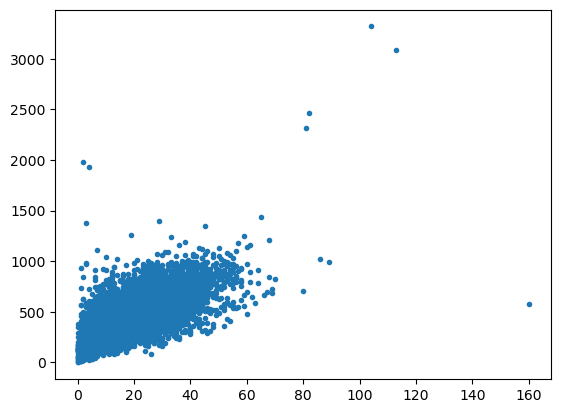

In [35]:
plt.plot(x, y, marker = '.', linestyle = 'none')

In [36]:
b = raw_nutritions[['eiwit', 'energie']]

In [37]:
b = b.dropna().reset_index()

In [38]:
b = b[['eiwit', 'energie']]

In [39]:
b

,eiwit,energie
0,25 g,630 kcal
1,3 g,160 kcal
2,21 g,440 kcal
3,16 g,550 kcal
4,8 g,235 kcal
...,...,...
8591,33 g,640 kcal
8592,38 g,770 kcal
8593,56 g,850 kcal
8594,10 g,290 kcal


In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [41]:
X_train

,eiwit
4922,25.0
3375,30.0
6198,36.0
4690,19.0
3834,31.0
...,...
5734,40.0
5191,34.0
5390,15.0
860,6.0


In [42]:
y_train

,energie
4922,505
3375,630
6198,590
4690,460
3834,650
...,...
5734,980
5191,620
5390,375
860,65


In [43]:
reg = LinearRegression()

In [44]:
reg.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = reg.predict(X_test)

In [46]:
# The coefficients
print("Coefficients: \n", reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[13.03924864]]
Mean squared error: 22911.38
Coefficient of determination: 0.57


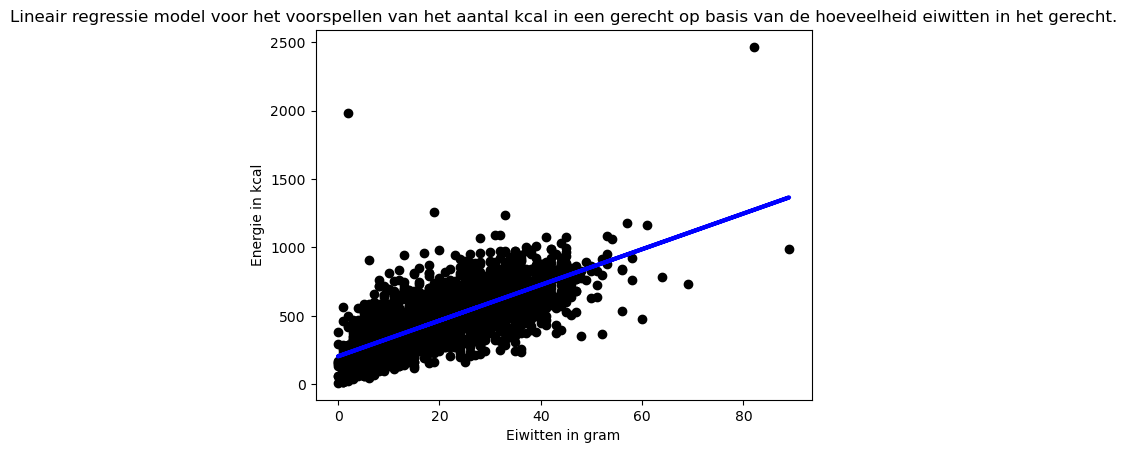

In [47]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

plt.title('Lineair regressie model voor het voorspellen van het aantal kcal in een gerecht op basis van de hoeveelheid eiwitten in het gerecht.')
plt.xlabel('Eiwitten in gram')
plt.ylabel('Energie in kcal')

plt.show()